## DATA EXPLORATION

You can find the used data on the kaggle page:
https://www.kaggle.com/c/freesound-audio-tagging/data

File Descriptions

train.csv - ground truth labels and other information relating to the   training audio

audio_train.zip - a folder containing the audio (.wav) training files

audio_test.zip - a folder containing the audio (.wav) test files

sample_submission.csv - a sample submission file in the correct format; contains the list of files found in the audio_test.zip folder

All audio samples in this dataset are gathered from Freesound and are provided here as uncompressed PCM 16 bit, 44.1 kHz, mono audio files. The ground truth data provided in this dataset has been obtained after a data labeling process which is described in the Data labeling process section below. FSDKaggle2018 sounds are unequally distributed in the following 41 categories of the AudioSet.

In [1]:
import pandas as pd
import librosa as ls
import matplotlib.pyplot as pl 
from librosa import display
import IPython.display as ipd  
import numpy as np

In [2]:
AUDIO_FOLDER = "./" ##PROJECT to NULL
AUDIO_TRAIN_FOLDER = AUDIO_FOLDER + "audio_train/" 
AUDIO_TEST_FOLDER = AUDIO_FOLDER + "audio_test/" 
train_data = pd.read_csv( AUDIO_FOLDER + "train.csv")
test_data = pd.read_csv( AUDIO_FOLDER + "sample_submission.csv")

In [3]:
print(AUDIO_TRAIN_FOLDER)

./audio_train/


In [15]:
print(train_data)

             fname                  label  manually_verified
0     00044347.wav                 Hi-hat                  0
1     001ca53d.wav              Saxophone                  1
2     002d256b.wav                Trumpet                  0
3     0033e230.wav           Glockenspiel                  1
4     00353774.wav                  Cello                  1
5     003b91e8.wav                  Cello                  0
6     003da8e5.wav                  Knock                  1
7     0048fd00.wav     Gunshot_or_gunfire                  1
8     004ad66f.wav               Clarinet                  0
9     0063ab88.wav      Computer_keyboard                  0
10    006f2f32.wav                 Hi-hat                  1
11    0075d39c.wav          Keys_jangling                  0
12    00780200.wav             Snare_drum                  0
13    0079d310.wav                Writing                  0
14    0091fc7f.wav                  Cello                  1
15    0097160c.wav      

In [5]:
print ("TOTAL TRAIN DATA SIZE =", train_data.shape)
print ("DISTINCT LABEL IN TRAIN SET =", len(train_data.label.unique())) 
print("DISTINCT LABEL SAMPLE:\n", train_data.label.unique())
train_data.head(5)

TOTAL TRAIN DATA SIZE = (9473, 3)
DISTINCT LABEL IN TRAIN SET = 41
DISTINCT LABEL SAMPLE:
 ['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [6]:
print ("TOTAL TEST DATA SIZE =", test_data.shape) #9473 wav files. Each has 3 columns as a feature
print ("DISTINCT LABEL IN TEST SET =", len(test_data.label.unique())) # 41 distinct label.
test_data.head(5)

TOTAL TEST DATA SIZE = (9400, 2)
DISTINCT LABEL IN TEST SET = 1


,fname,label
0,00063640.wav,Laughter Hi-Hat Flute
1,0013a1db.wav,Laughter Hi-Hat Flute
2,002bb878.wav,Laughter Hi-Hat Flute
3,002d392d.wav,Laughter Hi-Hat Flute
4,00326aa9.wav,Laughter Hi-Hat Flute



MINIMUM SAMPLES PER CATEGORY =  94
MAXIMUM SAPMLES PER CATEGORY =  300 



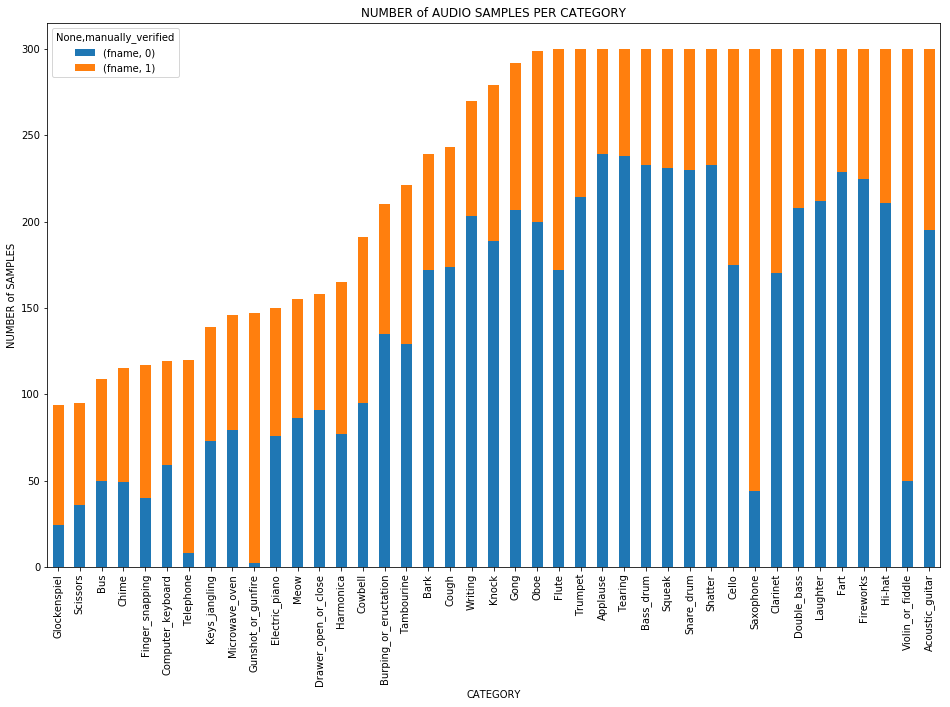

In [7]:
category_group_count = train_data.groupby(['label', 'manually_verified']).count()

plot = category_group_count.unstack().reindex(category_group_count.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="NUMBER of AUDIO SAMPLES PER CATEGORY", figsize=(16,10))
    
plot.set_xlabel("CATEGORY")
plot.set_ylabel("NUMBER of SAMPLES");

print('\nMINIMUM SAMPLES PER CATEGORY = ', min(train_data.label.value_counts()))
print('MAXIMUM SAPMLES PER CATEGORY = ', max(train_data.label.value_counts()), '\n')

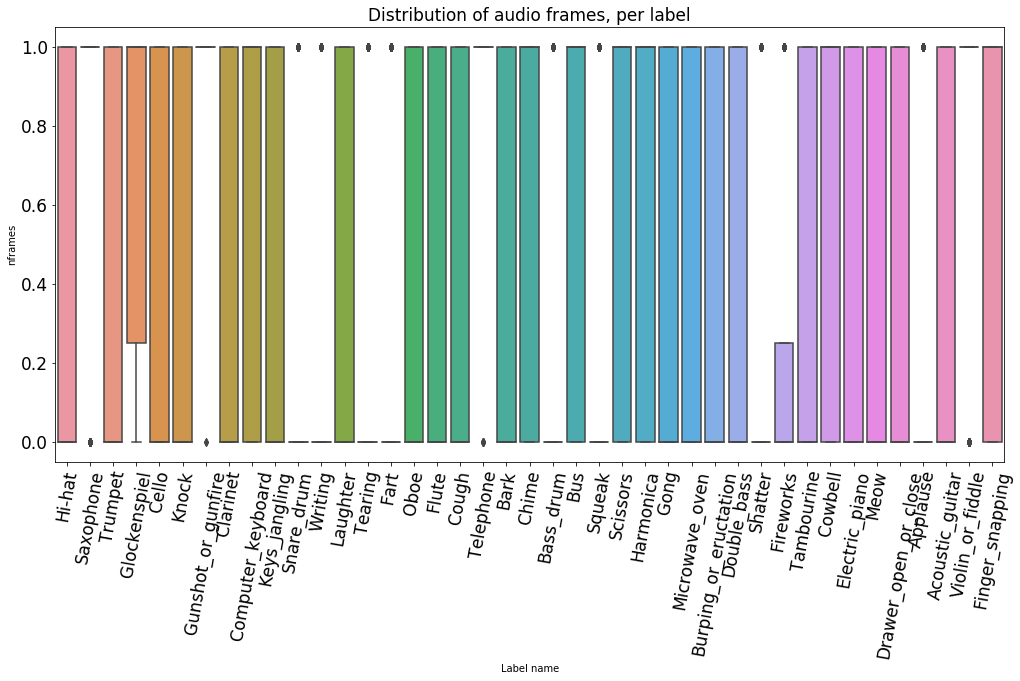

In [16]:
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

pl.figure(figsize=(17,8))
boxplot = sns.boxplot(x="label", y="manually_verified", data=train_data)
boxplot.set(xlabel='', ylabel='')
pl.title('Distribution of audio frames, per label', fontsize=17)
pl.xticks(rotation=80, fontsize=17)
pl.yticks(fontsize=17)
pl.xlabel('Label name')
pl.ylabel('nframes')
pl.show()

In [21]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

temp = train_data['manually_verified'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Manually varification of labels(0 - No, 1 - Yes)')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [24]:
audio_sample_1= AUDIO_TRAIN_FOLDER + "b7fe0cfc.wav"  #choosing samples
audio_sample_2= AUDIO_TRAIN_FOLDER + "b7fbbe04.wav"  #choosing samples longest
audio_sample_3= AUDIO_TRAIN_FOLDER + "b7bdcf30.wav"  #choosing samples shortest

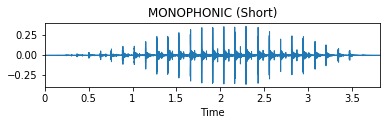

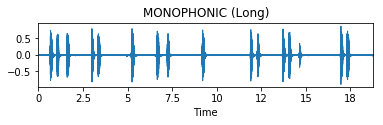

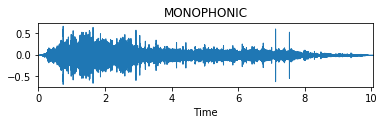

In [25]:
current_audio = audio_sample_3

y, sr = ls.load(current_audio)  
pl.figure()
pl.subplot(3, 1, 1)
display.waveplot(y, sr=sr)
pl.title('MONOPHONIC (Short)')         #RAW data
ipd.Audio(current_audio) 

current_audio = audio_sample_2

y, sr = ls.load(current_audio)  
pl.figure()
pl.subplot(3, 1, 1)
display.waveplot(y, sr=sr)
pl.title('MONOPHONIC (Long)')
ipd.Audio(current_audio)

current_audio = audio_sample_1

y, sr = ls.load(current_audio)  
pl.figure()
pl.subplot(3, 1, 1)
display.waveplot(y, sr=sr)
pl.title('MONOPHONIC')
ipd.Audio(current_audio)

In [26]:
import wave

current_audio = audio_sample_2
w = wave.open(current_audio)

print("SAMPLING RATE (Frame) = ", w.getframerate())
print("TOTAL SAMPLES (Frame) = ", w.getnframes())
print("DURATION = ", w.getnframes()/w.getframerate())

SAMPLING RATE (Frame) =  44100
TOTAL SAMPLES (Frame) =  828198
DURATION =  18.78


In [27]:
import os

## TRAIN

base_folder = AUDIO_TRAIN_FOLDER
audio_file_list = os.listdir(base_folder)
audio_statisics = []

for fname in audio_file_list :
    audio_full_path = base_folder + fname
    w = wave.open(audio_full_path)
    audio_info = [audio_full_path, w.getframerate(), w.getnframes(), w.getnframes()/w.getframerate()]
    audio_statisics.append(audio_info)
    
df_train = pd.DataFrame(data=audio_statisics,columns=['FULLPATH','RATE','FRAME','DURATION'])

df_train.head(5)

,FULLPATH,RATE,FRAME,DURATION
0,./audio_train/00044347.wav,44100,617400,14.00
1,./audio_train/001ca53d.wav,44100,455112,10.32
2,./audio_train/002d256b.wav,44100,19404,0.44
3,./audio_train/0033e230.wav,44100,352800,8.00
4,./audio_train/00353774.wav,44100,199332,4.52


In [28]:
df_train.sort_values(['FRAME','RATE'],ascending=[0,0]).head(5)

,FULLPATH,RATE,FRAME,DURATION
774,./audio_train/15d88b9d.wav,44100,1323000,30.0
991,./audio_train/1b643c7f.wav,44100,1323000,30.0
1292,./audio_train/23912d0e.wav,44100,1323000,30.0
1883,./audio_train/34427fee.wav,44100,1323000,30.0
3351,./audio_train/5a7fc70d.wav,44100,1323000,30.0


In [29]:
print(np.unique(np.asarray(df_train)[:,1]))

[44100]


In [30]:
## TEST

base_folder = AUDIO_TEST_FOLDER
audio_file_list = os.listdir(base_folder)
audio_statisics = []

for fname in audio_file_list :
    audio_full_path = base_folder + fname
    w = wave.open(audio_full_path)
    audio_info = [audio_full_path, w.getframerate(), w.getnframes(), w.getnframes()/w.getframerate()]
    audio_statisics.append(audio_info)
    
df_test = pd.DataFrame(data=audio_statisics,columns=['FULLPATH','RATE','FRAME','DURATION'])

df_test.head(5)

,FULLPATH,RATE,FRAME,DURATION
0,./audio_test/00063640.wav,44100,69678,1.58
1,./audio_test/0013a1db.wav,44100,36162,0.82
2,./audio_test/002bb878.wav,44100,59094,1.34
3,./audio_test/002d392d.wav,44100,22050,0.50
4,./audio_test/00326aa9.wav,44100,91728,2.08


In [31]:
df_test.sort_values(['FRAME','DURATION'],ascending=[1,1]).head(5)

,FULLPATH,RATE,FRAME,DURATION
388,./audio_test/0b0427e2.wav,44100,0,0.0
4009,./audio_test/6ea0099f.wav,44100,0,0.0
6603,./audio_test/b39975f5.wav,44100,0,0.0
2183,./audio_test/3d04368f.wav,44100,13230,0.3
2352,./audio_test/41990e60.wav,44100,13230,0.3


In [32]:
print(np.unique(np.asarray(df_test)[:,1]))

[44100]


## Mel Frequency Cepstral Coefficient (MFCC)

In [33]:
MFCC_TRAIN_FOLDER = AUDIO_FOLDER + "mfcc_train/"
MFCC_TEST_FOLDER = AUDIO_FOLDER + "mfcc_test/"

sound_path= AUDIO_TRAIN_FOLDER + "0aa32376.wav" ## Sample

In [34]:
def extract_mfcc_feature (isTrain, soundFilePath, n_mfcc) :
    
    import ntpath
    
    if(isTrain) :
         baseFolder = MFCC_TRAIN_FOLDER
    else :
         baseFolder = MFCC_TEST_FOLDER
    y, sr = ls.load(soundFilePath) 
    mfccs = ls.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta_mfccs= ls.feature.delta(mfccs)
    np.savetxt(baseFolder + ntpath.basename(soundFilePath) + ".mfcc", delta_mfccs, delimiter="\t")
    return delta_mfccs

extract_mfcc_feature(True,sound_path,50)

array([[-13.59808886, -13.59808886, -13.59808886, ...,   0.07265916,
          0.07265916,   0.07265916],
       [ -0.15753303,  -0.15753303,  -0.15753303, ...,   0.08132158,
          0.08132158,   0.08132158],
       [ -0.30502833,  -0.30502833,  -0.30502833, ...,   0.0232738 ,
          0.0232738 ,   0.0232738 ],
       ...,
       [ -1.26236149,  -1.26236149,  -1.26236149, ...,  -0.11347032,
         -0.11347032,  -0.11347032],
       [ -0.50513651,  -0.50513651,  -0.50513651, ...,  -0.09350994,
         -0.09350994,  -0.09350994],
       [  0.13819928,   0.13819928,   0.13819928, ...,  -0.07919341,
         -0.07919341,  -0.07919341]])

In [35]:
def extract_signal_feature (isTrain, soundFilePath) :
    
    import ntpath
    import scipy.io.wavfile as iw
    
    if(isTrain) :
         baseFolder = MFCC_TRAIN_FOLDER
    else :
         baseFolder = MFCC_TEST_FOLDER
    fname=ntpath.basename(soundFilePath)
    rate, sound_array = iw.read(soundFilePath)
    sound_info = [soundFilePath, fname, rate, sound_array.shape[0], sound_array.shape[0]/rate]
    print(sound_info)
    np.savetxt(baseFolder +  fname + ".mfcc", sound_info)
    return sound_info

def extract_All_Features () :
    
    import os
    import shutil
    import scipy.io.wavfile as iw
    
    audio_file_list = os.listdir(AUDIO_TRAIN_FOLDER)
    audio_test_file_list = os.listdir(AUDIO_TEST_FOLDER)
    np
    
    for fname in audio_file_list :
        extract_mfcc_feature(True , AUDIO_TRAIN_FOLDER + fname, 50)
        
    for fname in audio_test_file_list :
        extract_mfcc_feature(False, AUDIO_TEST_FOLDER  + fname, 50)

In [ ]:
extract_All_Features ()

## CNN Model

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import f1_score

In [ ]:
N_MFCC=50
MAX_OFFSET = 1500
SAMPLE_SET = -1
N_EPOCHS = 15
N_BATCH_SIZE = 20

_saved_model   = "./cnn_models/best_cnn_model.json"
_saved_weights = "./cnn_models/last_model.h5"
_saved_model_best_score   = "./cnn_models/model_v3.json"
_saved_weights_best_score = "./cnn_models/model_v3.h5"

In [ ]:
TRAIN = pd.read_csv( AUDIO_FOLDER + "train.csv")
TEST =  pd.read_csv(AUDIO_FOLDER + "sample_submission.csv")
UNIQ_LABEL_SET = TRAIN['label'].unique()



In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(TRAIN['label'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

class Config(object):
    def __init__(self,
                 n_classes=len(UNIQ_LABEL_SET),
                 n_folds=10, 
                 learning_rate=0.0001, 
                 n_mfcc=5):
        self.n_classes = n_classes
        self.n_mfcc = n_mfcc
        self.learning_rate = learning_rate
        self.dim = (self.n_mfcc, MAX_OFFSET, 1)
        
config = Config(learning_rate=0.001, n_mfcc=N_MFCC)

In [ ]:
from numpy import genfromtxt

def pading_mfccs (mfcc, max_ofset, n_mfcc) :
    zeros=np.zeros((n_mfcc,max_ofset))
    result = np.zeros_like(mfcc)
    x_offset = 0  
    y_offset = 0      
    zeros[x_offset:mfcc.shape[0]+x_offset,y_offset:mfcc.shape[1]+y_offset] = mfcc
    return zeros

def prepare_data(df, config, data_dir):
    X = np.empty(shape=(df.shape[0], config.dim[0], config.dim[1], 1))
    for i, row in df.iterrows() :
        full_mfcc_path = MFCC_TRAIN_FOLDER + row.fname + ".mfcc"
        mfcc = np.genfromtxt(full_mfcc_path, delimiter='\t')
        data = pading_mfccs(mfcc,MAX_OFFSET,N_MFCC)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    return X

In [ ]:
def prepare_x_and_y_trains() :
    df = TRAIN.head(SAMPLE_SET)
    
    new_data = prepare_data(df, config, AUDIO_TRAIN_FOLDER)
    
    
    data = df['label']
    #print(data)
    
    encoded = label_encoder.transform(data)
    #print (encoded)
    encoded = encoded.reshape(len(encoded), 1)
    encoded = onehot_encoder.transform(encoded)
    
    #print(encoded)
    target_label = encoded
    
    
    from sklearn.model_selection import StratifiedShuffleSplit

    SSS = StratifiedShuffleSplit(n_splits=10,test_size = 0.25)
    
    for train_index, test_index in SSS.split(new_data, target_label):
        X_train, X_test = new_data[train_index], new_data[test_index]
        y_train, y_test = target_label[train_index], target_label[test_index]
    

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepare_x_and_y_trains()

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import f1_score

from keras.layers import Input
from keras.layers import Convolution2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras import optimizers
from keras import losses
from keras.callbacks import ModelCheckpoint

In [ ]:
nclass = config.n_classes
    
inp = Input(shape=(config.dim[0],config.dim[1],1))
model_builder = Convolution2D(100, (4,4), padding="same")(inp)
model_builder = BatchNormalization()(model_builder)
model_builder = Activation("relu")(model_builder)
model_builder = MaxPool2D()(model_builder)

model_builder = Convolution2D(50, (4,4), padding="same")(model_builder)
model_builder = BatchNormalization()(model_builder)
model_builder = Activation("relu")(model_builder)
model_builder = MaxPool2D()(model_builder)

model_builder = Convolution2D(25, (4,4), padding="same")(model_builder)
model_builder = BatchNormalization()(model_builder)
model_builder = Activation("relu")(model_builder)
model_builder = MaxPool2D()(model_builder);

model_builder = Convolution2D(25, (4,4), padding="same")(model_builder)
model_builder = BatchNormalization()(model_builder)
model_builder = Activation("relu")(model_builder)
model_builder = MaxPool2D()(model_builder)

model_builder = Flatten()(model_builder)
model_builder = Dense(82)(model_builder)
model_builder = BatchNormalization()(model_builder)
model_builder = Activation("relu")(model_builder)
out = Dense(nclass, activation='softmax')(model_builder)

model = Model(inputs=inp, outputs=out)
opt = optimizers.Adam(config.learning_rate)

model.load_weights(_saved_weights)
# checkpoint
filepath=_saved_weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=N_BATCH_SIZE)

In [ ]:
predicted_y = model.predict(X_test, batch_size=N_BATCH_SIZE, verbose=1)

In [ ]:
model_json = model.to_json()
with open(_saved_model, "w") as json_file:
    json_file.write(model_json)
model.save_weights(_saved_weights)

score = model.evaluate(X_test, y_test, verbose=0) 

print(score)
print (model.metrics_names)

In [ ]:
predicted_y_max = np.argmax(predicted_y, axis=1)
y_test_max = np.argmax(y_test, axis=1)

y_predictec_decoded_labels = label_encoder.inverse_transform(predicted_y_max)
y_test_decoded_labels = label_encoder.inverse_transform(y_test_max)

print(y_predictec_decoded_labels.shape)
print(y_test_decoded_labels.shape)

f1_score_results = f1_score(y_test_decoded_labels, y_predictec_decoded_labels, average='micro')

In [ ]:
print (f1_score_results) * 100

#  Random Choice

In [ ]:
from random import randint

random_predicted_labels = np.empty(shape=y_predictec_decoded_labels.shape,dtype =np.dtype(object))

for i in range(len(X_test)) :
    rnd = randint(0, config.n_classes-1)
    random_predicted_labels[i]=uniq_label_set[rnd]
    
f1_score_rnd = f1_score(y_test_decoded_labels, random_predicted_labels, average='micro')

In [ ]:
print (f1_score_rnd) * 100

# Calculated Highest CNN Score 

In [ ]:
# load json and create model
json_file = open(_saved_model_best_score, 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
loaded_model.summary()
loaded_model.load_weights(_saved_weights_best_score)

In [ ]:
best_predicted_y = loaded_model.predict(X_test, batch_size=N_BATCH_SIZE, verbose=1)

In [ ]:
score_of_best_score = loaded_model.evaluate(X_test, y_test, verbose=0) 

print(score)
print(loaded_model.metrics_names)

In [ ]:
predicted_y_max = np.argmax(best_predicted_y, axis=1)
y_predictec_decoded_labels = label_encoder.inverse_transform(predicted_y_max)

f1_score_of_best_model_results = f1_score(y_test_decoded_labels, y_predictec_decoded_labels, average='micro')

print (f1_score_of_best_model_results) * 100

# Visualize the accuracy and Loss Graphics Of CNN Model

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy and loss

plt.plot(history.history['acc'])
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['LOSS'])
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')ns
plt.legend(['train', 'test'], loc='upper left')
plt.show()